In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, accuracy_score, recall_score, precision_score, balanced_accuracy_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Importing Seaborn library
import os
from sklearn.model_selection import train_test_split 
from sklearn import metrics


In [15]:
#load data from CSV file
data = pd.read_csv("/Users/catherinebetancourt-lee/BMEN 415/fetal_health.csv.csv")

In [16]:
#Merging classification classes into binary 
data['fetal_health'] = data['fetal_health'].replace(1.0,0)
data['fetal_health'] = data['fetal_health'].replace(2.0,0)
data['fetal_health'] = data['fetal_health'].replace(3.0,1)

In [17]:
#Separate data and target variables
X = data.drop('fetal_health', axis = 1)
X
y = data['fetal_health']
y

0       0
1       0
2       0
3       0
4       0
       ..
2121    0
2122    0
2123    0
2124    0
2125    0
Name: fetal_health, Length: 2126, dtype: int64

In [18]:
#split model into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=142)

In [19]:
#We need to create the LASSO model
#penalty = L1 to apply the regularization, and then set saga for larger datasets.
#C = inverse of regularization strength to 0.1
lasso_model = LogisticRegression(penalty = 'l1', solver='saga', C=0.1)

In [20]:
#fit the model into the training data
lasso_model.fit(X_train, y_train)

/Users/catherinebetancourt-lee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.1, penalty='l1', solver='saga')

In [21]:
#predict on testing set
y_pred = lasso_model.predict(X_test)


In [22]:
#metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred)
print("F1 Score", f1)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_acc)
recall = recall_score(y_test, y_pred)
print("Recall Score:", recall)
precision = precision_score(y_test, y_pred)
print("Precision Score:", precision)
auc = roc_auc_score(y_test, y_pred)
print("AUC Score:", auc)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

Accuracy: 0.9647887323943662
F1 Score 0.7619047619047619
Balanced Accuracy: 0.8377420533430764
Recall Score: 0.6857142857142857
Precision Score: 0.8571428571428571
AUC Score: 0.8377420533430764
Confusion matrix:
[[387   4]
 [ 11  24]]


0.9647887323943662


/Users/catherinebetancourt-lee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


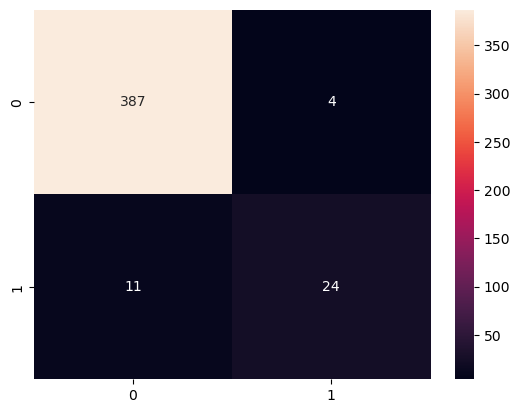

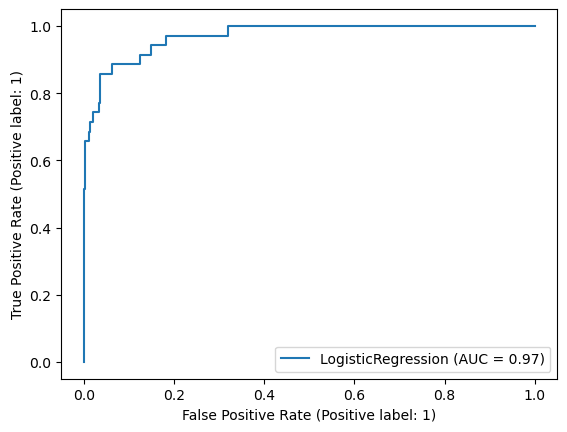

In [24]:
sns.heatmap(cm,annot=True, annot_kws={'size':10}, fmt='d')
print(accuracy_score(y_test, y_pred))

metrics.plot_roc_curve(lasso_model, X_test, y_test)
plt.show()